In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<AxesSubplot: >

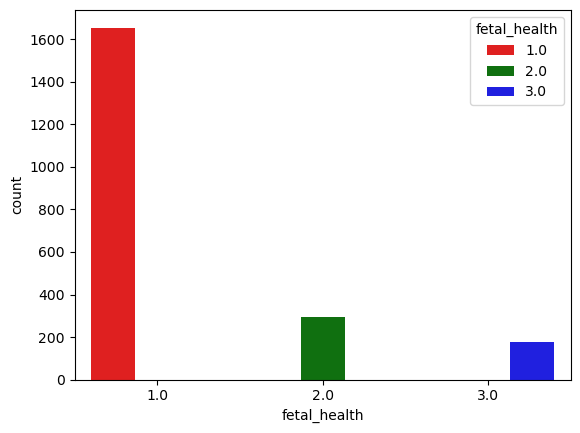

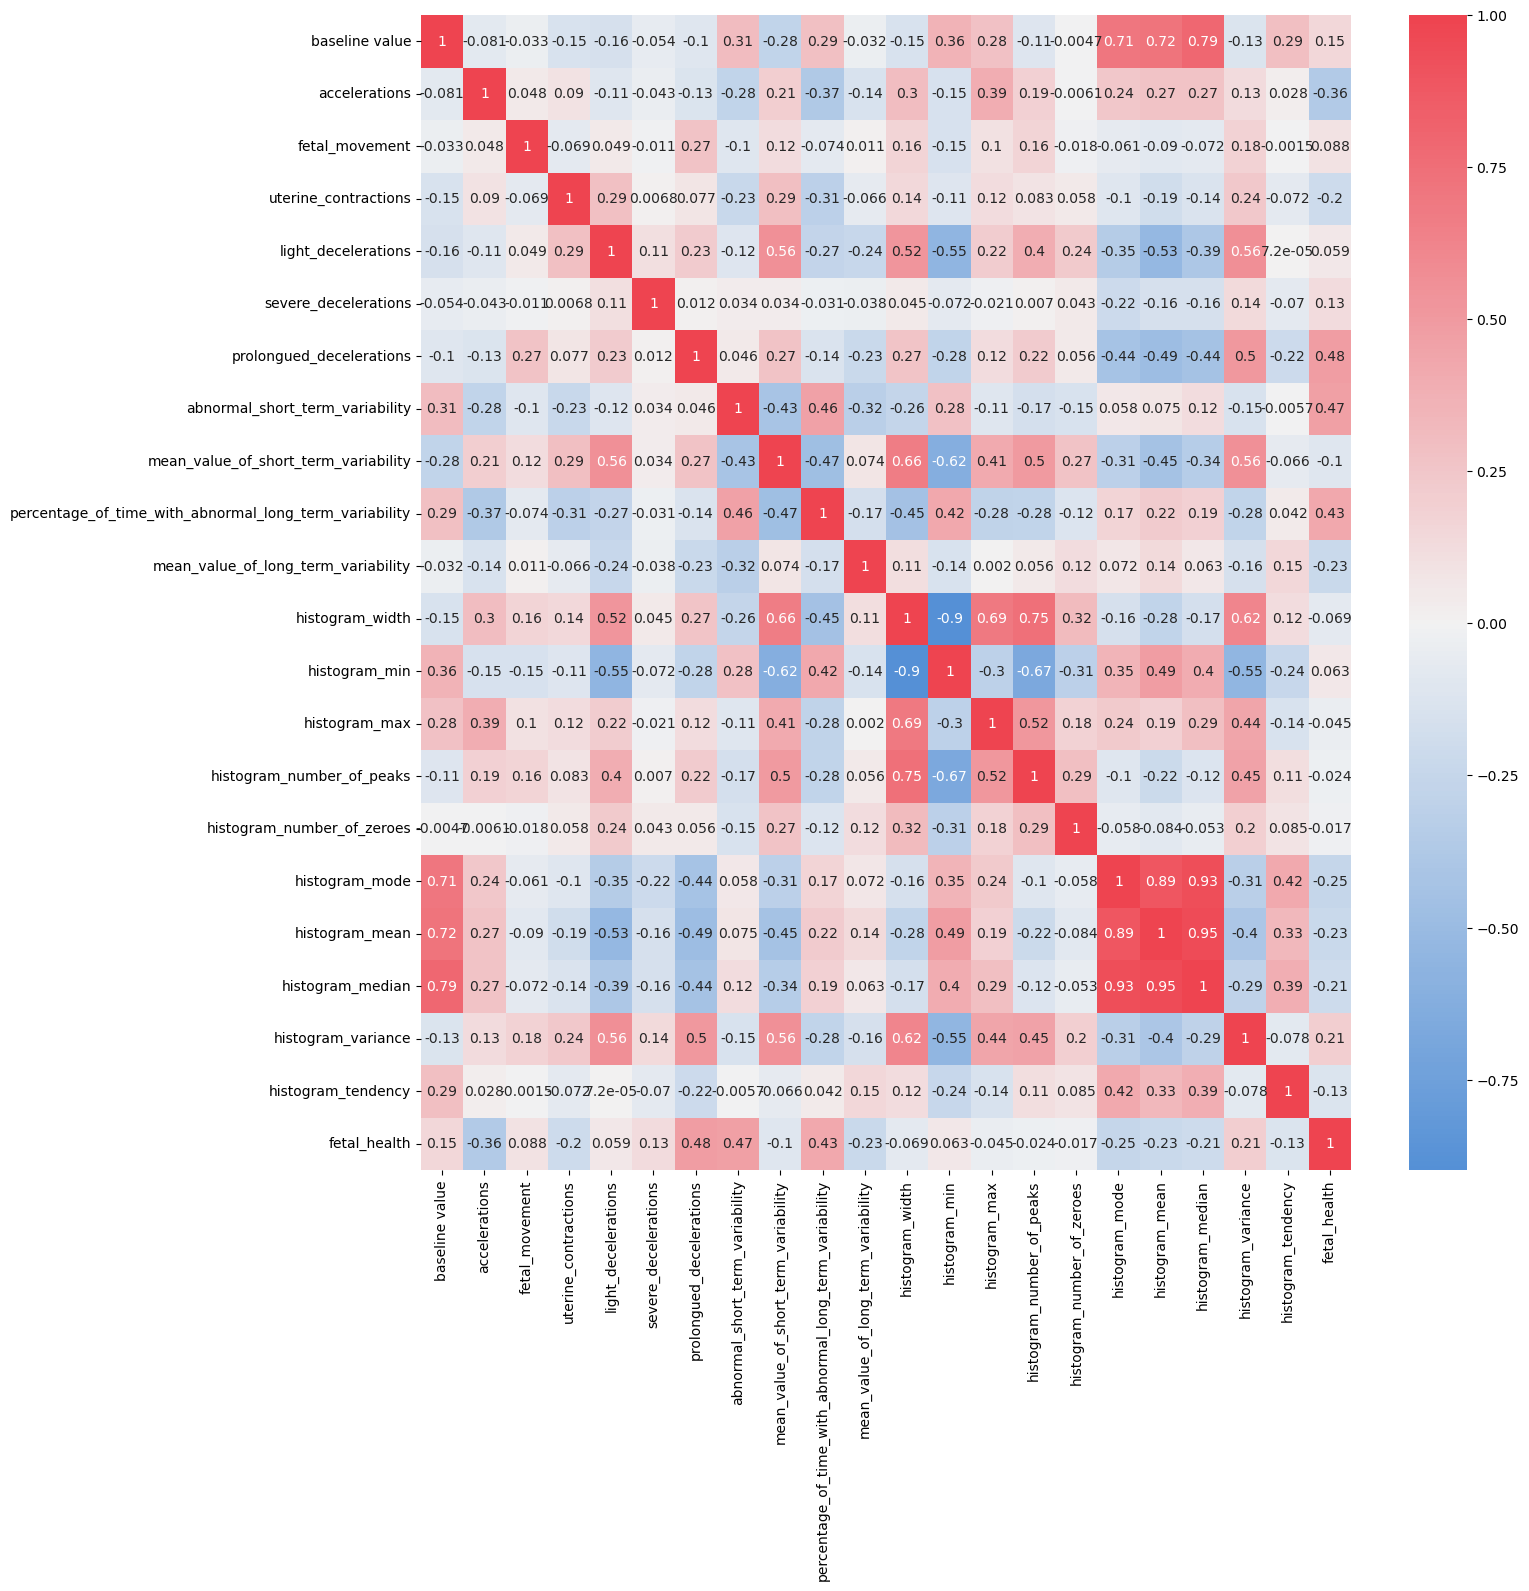

In [22]:
file_path = 'fetal_health.csv'
data = pd.read_csv(file_path)
data.info()

#Countplot
colors = ['red', 'green', 'blue']
sns.countplot(data=data, x='fetal_health', hue='fetal_health', palette=colors)

#Correlation map
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

#### Based on the above heatmap, I would say that "accelerations", "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", and "mean_value_of_long_term_variability" have the highest correlations to the target variable "fetal_health"

In [23]:
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']
col_names = list(X.columns)

#Scaling
scaler = StandardScaler()
X_df = scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,-1.803982e-16,-1.958452e-15,-2.625683e-15,-5.127706e-15,7.254767e-16,4.324961e-15,2.687304e-16,-2.481552e-16,2.291362e-15,...,8.564279e-17,-6.120326e-17,-4.047144e-17,2.408965e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


In [24]:
X_train, X_test, y_train,y_test = train_test_split(X_df, y, train_size=0.75, random_state=42)

model1 = DecisionTreeClassifier(random_state=42)
model2 = SVC()
model3 = RandomForestClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

report1 = classification_report(y_test, y_pred1)
report2 = classification_report(y_test, y_pred2)
report3 = classification_report(y_test, y_pred3)

print(report1)
print(report2)
print(report3)

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       413
         2.0       0.80      0.85      0.83        82
         3.0       0.92      0.95      0.93        37

    accuracy                           0.94       532
   macro avg       0.90      0.92      0.91       532
weighted avg       0.94      0.94      0.94       532

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       413
         2.0       0.76      0.77      0.76        82
         3.0       0.90      0.76      0.82        37

    accuracy                           0.92       532
   macro avg       0.87      0.83      0.85       532
weighted avg       0.92      0.92      0.92       532

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       413
         2.0       0.91      0.83      0.87        82
         3.0       0.89      0.92      0.91        37

    accuracy        

#### Based on running these two models, it seems that the Decision Tree classifier is the best suited for handling this dataset.